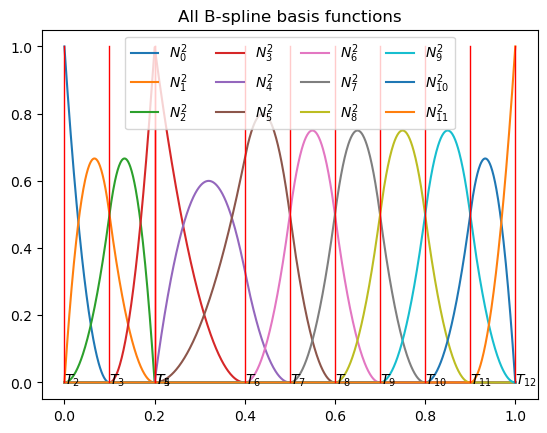

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
def find_span(knots, degree, x):

    low  = degree
    high = len(knots)- degree - 1

    if x <= knots[low] : valspan = low
    elif x  >= knots[high] : valspan = high -1
    else :
        #binary search
        span = (low+high)//2
        while x < knots[span] or x >= knots[span+1]:
            if  x < knots[span]:
                high = span
            else : 
                low = span
            span =(low+high)//2
        valspan = span 
    return valspan 
# ==========================================================
def all_Bspline(knots, degree, span, x):

    values = np.empty(degree+1, dtype = float)
    left   = np.empty(degree  , dtype = float)
    right  = np.empty(degree  , dtype = float)
    #..
    values[0] = 1.0
    for i in range(degree):
        left[i]  = x- knots[span-i] 
        right[i] = knots[span+i+1] - x
        saved    =  0.
        for j in range(i+1):
            tmp       = values[j]/(right[j]+left[i-j])
            values[j] = saved + right[j] * tmp
            saved     = left[i-j]*tmp
        values[i+1]  = saved
    return values 
 
# -----------------------------------------------------------
#...Computes and plots all B-spline functions
def plot_Bspline(knots, degree, nt=100):
 
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    t = np.linspace(a,b, nt)

    #.. m : number of B-spline in Shoenberg space
    m = len(knots) - degree - 1

    # Bspline Vector
    Bs = np.zeros((m,nt))
    for i in range(nt):
       x    = t[i]
       span = find_span(knots, degree, x)
       b    = all_Bspline(knots, degree, span, x)
       Bs[span-degree: span+1,i] = b
    for j in range(m):
      plt.plot(t,Bs[j,:], label='$N^{'+str(degree)+'}_{'+str(j)+'}$')
    for j in range(degree,len(knots)-degree):
      plt.plot([knots[j], knots[j]], [0,1.], 'r', lw=1.)
      plt.text(knots[j], -0.005, '$T_{'+str(j)+'}$')

    plt.title('All B-spline basis functions')
    plt.legend(loc=9, ncol=4)
    plt.show()

knots = [0.,0.,0.,0.1,0.2,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.,1.,1.]
degree = 2
plot_Bspline(knots, degree, nt=1000)
plt.show()

#### Exercice 1: Changez le degré dans le code ci-dessus en 3 et exécuter. ( au lieu de degree = 2 prennez vous degree = 3 et executer "ctr+entree")
 
 1. Que remarquez-vous ? et justifiez le résultat ?
 2. A quoi sert la multiplicité d'ordre 'degree+1' dans le vecteur nœuds ?
 3. Essayez maintenant avec le vecteur de nœuds d'ordre 'degree+1' ?
 4. Combien de courbes B-spline qui ne s'annulent pas entre deux droites ? justifiez le nombre ?
 5. Dans combien de sous-intervalles chaque courbe ne s'annule-t-elle pas ?

Reponse :
    1.(Ind. reponse est dans la page 26 dernier paragraphe (clamped and unclamped knot vector))
    2. (Ind. la reponse est dans la page 47, R)
    3. (Ind. voir le vecteur de noeud (knots), ajoutez 0. dans le debut et 1. a la fin et executez (multiplicité 4 pour 0 et 1) )
    4. (Ind. il suffit de prendre deux droits et de compter le nombre de courbe B-spline)
    5. (Ind. Prenez une courbe par exemple $N^3_0$ et comptez le nombre d'intervalles dans lesquels cette courbe se présente.)

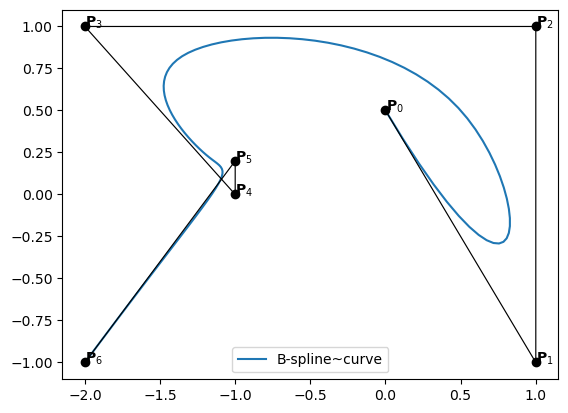

In [3]:

# ==========================================================
def point_on_bspline_curve(knots, P, x):
    degree = len(knots) - len(P) - 1
    d = P.shape[-1]

    span = find_span( knots, degree, x )
    b    = all_Bspline( knots, degree, span, x )

    c = np.zeros(d)
    for k in range(0, degree+1):
        c[:] += b[k]*P[span-degree+k,:]
    return c

# -----------------------------------------------------------
#...Computes and plots an example of B-spline curve
def plot_curve_Bspline():
   
    knots  = [0., 0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1., 1.]
    degree = 3
    n      = len(knots) - degree - 1
    
    P = np.zeros((n, 2))
    P[:, 0] = [0.,  1., 1., -2., -1., -1., -2.]
    P[:, 1] = [.5, -1., 1.,  1.,  0.,  0.2, -1.]   

    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_bspline_curve(knots, P, x)
    plt.plot(Q[:,0], Q[:,1], lw = 1.5, label='B-spline~curve')
    plt.plot(P[:,0], P[:,1], '-ok', lw = 0.85)
    for j in range(n):
      x = P[j,0]
      y = P[j,1]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')
    plt.legend()
    plt.show()
plot_curve_Bspline()
plt.show()

#### Exercice 2 : 
  1. changer sur le code pour qu'il marche avec " degree = 3 "
  2. Quelle est la relation entre le nombre de points dans le vecteur de nœuds et le polygone de contrôle ?

Répense : 
    1. CDF
    2. (Ind. la reponse est le petit 'n' dans le code ci-dessus, il suffit just de formuler la répense) 

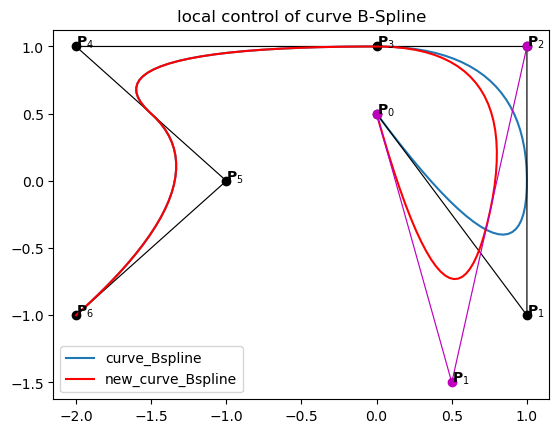

In [4]:


# -----------------------------------------------------------
#..shows the local change of the B-spline curve 
#.that corresponds to the change in one control point 
def plot_local_contorl_curve_Bspline():
   
    knots  = [0., 0., 0., 0.25, 0.5, 0.5, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    #--control points    
    P = np.zeros((n, 2))
    P[:, 0] = [0.,  1., 1., 0., -2., -1., -2.]
    P[:, 1] = [.5, -1., 1., 1.,  1.,  0., -1.]   

    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_bspline_curve(knots, P, x)
    plt.title('local control of curve B-Spline')
    plt.plot(Q[:,0], Q[:,1], lw = 1.5, label='curve_Bspline')
    plt.plot(P[:,0], P[:,1], '-ok', lw = 0.85)
    for j in range(n):
      x = P[j,0]
      y = P[j,1]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')

    #-We move just a one control point 
    P[1, 0] = 0.5
    P[1, 1] = -1.5   

    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_bspline_curve(knots, P, x)
    plt.plot(Q[:,0], Q[:,1], 'r', lw = 1.5, label='new_curve_Bspline')
    plt.plot(P[:3,0], P[:3,1], '-om', lw = 0.85)

    x = P[1,0]
    y = P[1,1]
    plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(1) + '}$')
    plt.legend()
    plt.show()
plot_local_contorl_curve_Bspline()
plt.show()

#### Exercice 3 :
    1. Le changement d'une position dans le polygone de contrôle implique un changement :
         a. sur toute la courbe.
         b. uniquement au voisinage de ce point.
    2. Justifiez votre réponse.
    3. Ce que l'on peut dire dans le cas d'une courbe de Bézier?

Reponse :
    1. 
    2. (Ind. Proposition 3.3.2 page 37)
    3. (Ind. la reponse est dans le TP.pdf que j'ai envoyer Exercive 03/ question 2)

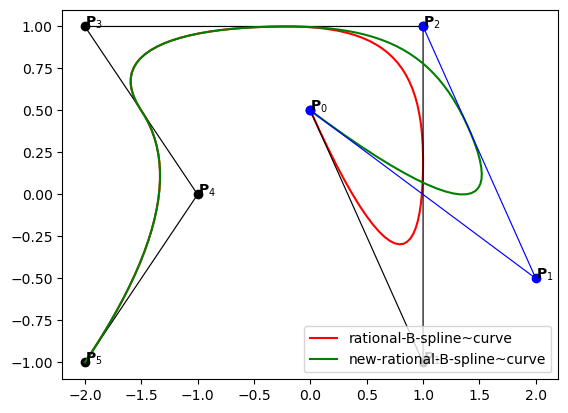

In [5]:
# ==========================================================
def point_on_rational_bspline_curve(knots, w, P, x):
    degree = len(knots) - len(P) - 1
    d = P.shape[-1]

    span = find_span( knots, degree, x )
    b    =  all_Bspline( knots, degree, span, x )

    #...We compute the Rational B-spline
    #.. using the property of compact support
    # :Only (degree+1) B-spline that 
    # not vanish will figure in the summation. 

    ratio = 0.
    for k in range(0, degree+1):
        b[k]   = b[k]*w[span-degree+k]
        ratio += b[k]
    R = b / ratio
    #..Assembles rational B-spline curve
    c = np.zeros(d)
    for k in range(0, degree+1):
        c[:] += R[k]*P[span-degree+k,:]
    return c

# -----------------------------------------------------------
#...Computes and plots an example of rational B-spline curve
def plot_curve_rational_Bspline():
   
    knots  = [0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    
    P = np.zeros((n, 2))
    P[:, 0] = [0.,  1., 1., -2., -1., -2.]
    P[:, 1] = [.5, -1., 1.,  1.,  0., -1.]   
    #...
    w      = [1., 1., 1.5,  1.,  1., 1.]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_rational_bspline_curve(knots, w, P, x)
    plt.plot(Q[:,0], Q[:,1], 'r', lw = 1.5, label='rational-B-spline~curve')
    plt.plot(P[:,0], P[:,1], '-ok', lw = 0.85)
    for j in range(n):
        
      x = P[j,0]
      y = P[j,1]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')

    #-We move just a one control point
    P[1, 0] =  2.
    P[1, 1] = -.5  
    #...
    w      = [1., 1., 1.5,  1.,  1., 1.]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_rational_bspline_curve(knots, w, P, x)
    plt.plot(Q[:,0], Q[:,1], 'g', lw = 1.5, label='new-rational-B-spline~curve')
    plt.plot(P[0:3,0], P[0:3,1], '-ob', lw = 0.85)
    x = P[1,0]
    y = P[1,1]
    plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(1) + '}$')
    plt.legend()
    plt.show()
plot_curve_rational_Bspline()
plt.show()

#### Exercice 5 : changer sur le code "plot_curve_rational_Bspline() " pour qu'il marche avec " degree = 3 "
(Ind.

il suffit de remplacer chaqu'une dans le code comme suit :

    knots  = [0., 0., 0., 0., 0.25, 0.5, 0.75, 1., 1., 1., 1.]
    
    degree = 3
    
    P[:, 0] = [0.,  1., 1., -2., -1., -1., -2.]
    P[:, 1] = [.5, -1., 1.,  1.,  0., -1.,  -1.]   
    
    #...
    w      = [1., 1., 1.5,  1.5,  1.,  1., 1.] (changez les deux)
)

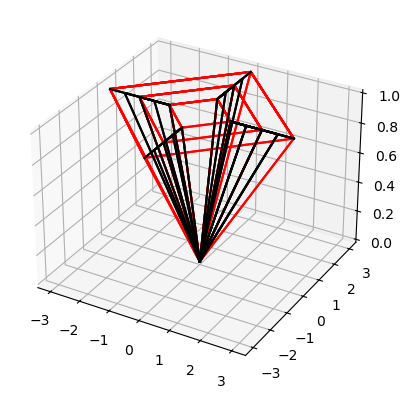

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
# -----------------------------------------------------------
#---This example shows the two circles of the annulus domain.
def plot_annular_surface_rational_Bspline(z=4.):
   
    knots  = [0., 0., 0., 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    #..internal circle    
    #-n is number of basis functions, 3 is dimension, 3 number of circle 
    P = np.zeros((n, 3, 3))
    P[:, 0,0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
    P[:, 1,0] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]
    P[:, 2,0] = z   
    #..middle circle    
    P[:, 0,1] = 2.*P[:, 0,0]
    P[:, 1,1] = 2.*P[:, 1,0]
    P[:, 2,1] = z   
    #..external circle    
    P[:, 0,2] = 3.*P[:, 0,0]
    P[:, 1,2] = 3.*P[:, 1,0]
    P[:, 2,2] = z   
    #...
    w      = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 5
    t = np.linspace(a,b, nt)
    
    #...plot
    for j in range(P.shape[2]):
        Q = np.zeros((nt,3))
        for i in range(nt) :
            x    = t[i]
         #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
            Q[i,:] =  point_on_rational_bspline_curve(knots, w, P[:,:,j], x)
      #...   
            ax.plot3D(Q[:,0], Q[:,1], Q[:,2], 'r', lw = 1.5)

    #..The circle passe through the points that have the even index
    #--We use this points in the other curve
    knots  = [0., 0., 0.5, 1., 1.]
    degree = 1
    n      = len(knots) - degree - 1
    w      = [1., 1., 1.]
    P1 = np.zeros((n, 3, 5))
    P1[0, 0,:] = [P[0, 0,0], P[2, 0,0],  P[4, 0,0],  P[6, 0,0], P[8, 0,0]]
    P1[0, 1,:] = [P[0, 1,0], P[2, 1,0],  P[4, 1,0],  P[6, 1,0], P[8, 1,0]]
    P1[0, 2,:] = z   
    #..middle circle    
    P1[1, 0,:] = [P[0, 0,1], P[2, 0,1],  P[4, 0,1],  P[6, 0,1], P[8, 0,1]]
    P1[1, 1,:] = [P[0, 1,1], P[2, 1,1],  P[4, 1,1],  P[6, 1,1], P[8, 1,1]]
    P1[1, 2,:] = z   
    #..external circle    
    P1[2, 0,:] = [P[0, 0,2], P[2, 0,2],  P[4, 0,2],  P[6, 0,2], P[8, 0,2]]
    P1[2, 1,:] = [P[0, 1,2], P[2, 1,2],  P[4, 1,2],  P[6, 1,2], P[8, 1,2]]
    P1[2, 2,:] = z 
    for j in range(5):
        Q = np.zeros((nt,3))
        for i in range(nt) :
            x    = t[i]
         #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
            Q[i,:] =  point_on_rational_bspline_curve(knots, w, P1[:,:,j], x)
            ax.plot3D(Q[:,0], Q[:,1], Q[:,2], 'k', lw = 1.5)
    
fig = plt.figure()
ax  = plt.axes(projection='3d')
for i in range(2):
   z = 4.+0.005*i
   plot_annular_surface_rational_Bspline(1)
plt.show()

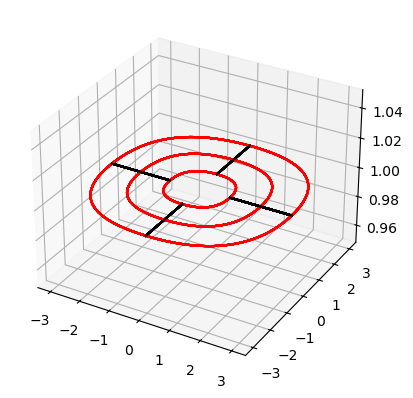

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
# -----------------------------------------------------------
#---This example shows the two circles of the annulus domain.
def plot_annular_surface_rational_Bspline(z=4.):
   
    knots  = [0., 0., 0., 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    #..internal circle    
    #-n is number of basis functions, 3 is dimension, 3 number of circle 
    P = np.zeros((n, 3, 3))
    P[:, 0,0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
    P[:, 1,0] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]
    P[:, 2,0] = z   
    #..middle circle    
    P[:, 0,1] = 2.*P[:, 0,0]
    P[:, 1,1] = 2.*P[:, 1,0]
    P[:, 2,1] = z   
    #..external circle    
    P[:, 0,2] = 3.*P[:, 0,0]
    P[:, 1,2] = 3.*P[:, 1,0]
    P[:, 2,2] = z   
    #...
    w      = [1. , 1. , 1. , 1. , 1. , 1., 1. , 1. , 1. ]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...plot
    for j in range(P.shape[2]):
        
        Q = np.zeros((nt,3))
        for i in range(nt) :
            
            x    = t[i]
         #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
            Q[i,:] =  point_on_rational_bspline_curve(knots, w, P[:,:,j], x)
            
        #...   
        ax.plot3D(Q[:,0], Q[:,1], Q[:,2], 'r', lw = 1.5)

    #..The circle passe through the points that have the even index
    #--We use these points in the other curve
    knots  = [0., 0., 0.5, 1., 1.]
    degree = 1
    n      = len(knots) - degree - 1
    w      = [1., 1., 1.]
    P1 = np.zeros((n, 3, 5))
    P1[0, 0,:] = [P[0, 0,0], P[2, 0,0],  P[4, 0,0],  P[6, 0,0], P[8, 0,0]]
    P1[0, 1,:] = [P[0, 1,0], P[2, 1,0],  P[4, 1,0],  P[6, 1,0], P[8, 1,0]]
    P1[0, 2,:] = z   
    #..middle circle    
    P1[1, 0,:] = [P[0, 0,1], P[2, 0,1],  P[4, 0,1],  P[6, 0,1], P[8, 0,1]]
    P1[1, 1,:] = [P[0, 1,1], P[2, 1,1],  P[4, 1,1],  P[6, 1,1], P[8, 1,1]]
    P1[1, 2,:] = z   
    #..external circle    
    P1[2, 0,:] = [P[0, 0,2], P[2, 0,2],  P[4, 0,2],  P[6, 0,2], P[8, 0,2]]
    P1[2, 1,:] = [P[0, 1,2], P[2, 1,2],  P[4, 1,2],  P[6, 1,2], P[8, 1,2]]
    P1[2, 2,:] = z 
    for j in range(5):
        Q = np.zeros((nt,3))
        for i in range(nt) :
            x    = t[i]
            #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
            Q[i,:] =  point_on_rational_bspline_curve(knots, w, P1[:,:,j], x)
        #...   
        ax.plot3D(Q[:,0], Q[:,1], Q[:,2], 'k', lw = 1.5)
    
fig = plt.figure()
ax  = plt.axes(projection='3d')

for i in range(20):
    z = 4.+0.005*i
    plot_annular_surface_rational_Bspline(1)
plt.show()


In [12]:
P = np.zeros((9, 3, 3))
P[:, 0,0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
P[:, 1,0] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]
# P[:, 2,0] = 1
print(P)

[[[ 1.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 1.  0.  0.]
  [ 0.  0.  0.]]

 [[-1.  0.  0.]
  [ 1.  0.  0.]
  [ 0.  0.  0.]]

 [[-1.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[-1.  0.  0.]
  [-1.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [-1.  0.  0.]
  [ 0.  0.  0.]]

 [[ 1.  0.  0.]
  [-1.  0.  0.]
  [ 0.  0.  0.]]

 [[ 1.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


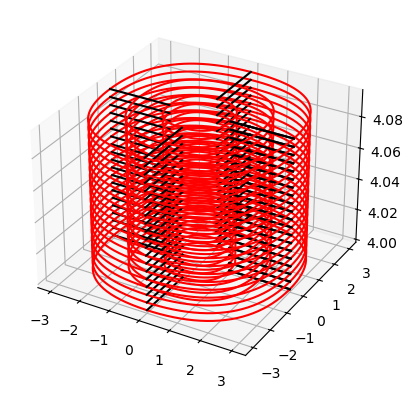

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
# -----------------------------------------------------------
#---This example shows the two circles of the annulus domain.
def plot_annular_surface_rational_Bspline(z=4.):
   
    knots  = [0., 0., 0., 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    #..internal circle    
    #-n is number of basis functions, 3 is dimension, 3 number of circle 
    P = np.zeros((n, 3, 3))
    P[:, 0,0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
    P[:, 1,0] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]
    P[:, 2,0] = z   
    #..middle circle    
    P[:, 0,1] = 2.*P[:, 0,0]
    P[:, 1,1] = 2.*P[:, 1,0]
    P[:, 2,1] = z   
    #..external circle    
    P[:, 0,2] = 3.*P[:, 0,0]
    P[:, 1,2] = 3.*P[:, 1,0]
    P[:, 2,2] = z   
    #...
    w      = [1. ,  1, 1. , 1. , 1. , 1., 1. , 1. , 1. ]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...plot
    for j in range(P.shape[2]):
        
        Q = np.zeros((nt,3))
        for i in range(nt) :
            
            x    = t[i]
         #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
            Q[i,:] =  point_on_rational_bspline_curve(knots, w, P[:,:,j], x)
            
        #...   
        ax.plot3D(Q[:,0], Q[:,1], Q[:,2], 'r', lw = 1.5)

    #..The circle passes through the points that have the even index
    #--We use these points in the other curve
    knots  = [0., 0., 0.5, 1., 1.]
    degree = 1
    n      = len(knots) - degree - 1
    w      = [1., 1., 1.]
    P1 = np.zeros((n, 3, 5))
    P1[0, 0,:] = [P[0, 0,0], P[2, 0,0],  P[4, 0,0],  P[6, 0,0], P[8, 0,0]]
    P1[0, 1,:] = [P[0, 1,0], P[2, 1,0],  P[4, 1,0],  P[6, 1,0], P[8, 1,0]]
    P1[0, 2,:] = z   
    #..middle circle    
    P1[1, 0,:] = [P[0, 0,1], P[2, 0,1],  P[4, 0,1],  P[6, 0,1], P[8, 0,1]]
    P1[1, 1,:] = [P[0, 1,1], P[2, 1,1],  P[4, 1,1],  P[6, 1,1], P[8, 1,1]]
    P1[1, 2,:] = z   
    #..external circle    
    P1[2, 0,:] = [P[0, 0,2], P[2, 0,2],  P[4, 0,2],  P[6, 0,2], P[8, 0,2]]
    P1[2, 1,:] = [P[0, 1,2], P[2, 1,2],  P[4, 1,2],  P[6, 1,2], P[8, 1,2]]
    P1[2, 2,:] = z
    for j in range(5):
        Q = np.zeros((nt,3))
        for i in range(nt) :
            x    = t[i]
            #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
            Q[i,:] =  point_on_rational_bspline_curve(knots, w, P1[:,:,j], x)
        #...   
        ax.plot3D(Q[:,0], Q[:,1], Q[:,2], 'k', lw = 1.5)
    
fig = plt.figure()
ax  = plt.axes(projection='3d')
for i in range(20):
    z = 4.+0.005*i
    plot_annular_surface_rational_Bspline(z)
plt.show()

#### Exercice 7 : augmenter le nombre de disques dans la figure ci-dessus à 5, ce qui est nécessaire pour compléter le modèle de cylindre.

Reponse : 

(Ind. 

il suffit de changer

for i in range(2):

par 

for i in range(5):)

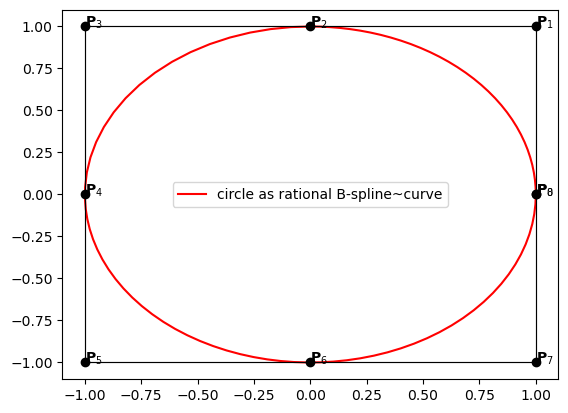

In [10]:
# -----------------------------------------------------------
def plot_circle_rational_Bspline():
   
    knots  = [0., 0., 0., 1/3, 1/3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    
    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
    P[:, 1] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]   
    #...
    w      = [1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1., 1/np.sqrt(2), 1.]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_rational_bspline_curve(knots, w, P, x)
    plt.plot(Q[:,0], Q[:,1], 'r', lw = 1.5, label='circle as rational B-spline~curve')
    plt.plot(P[:,0], P[:,1], '-ok', lw = 0.85)
    for j in range(n):
      x = P[j,0]
      y = P[j,1]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')
    plt.legend()
    plt.show()
plot_circle_rational_Bspline()
plt.show()

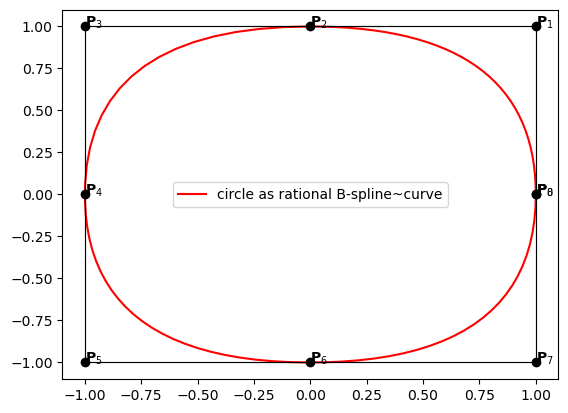

In [11]:
# -----------------------------------------------------------
def plot_circle_rational_Bspline():
   
    knots  = [0., 0., 0., 1/3, 1/3, 0.5, 0.5, 0.75, 0.75, 1., 1., 1.]
    degree = 2
    n      = len(knots) - degree - 1
    
    P = np.zeros((n, 2))
    P[:, 0] = [1., 1., 0., -1., -1., -1.,  0.,  1., 1.]
    P[:, 1] = [0., 1., 1.,  1.,  0., -1., -1., -1., 0.]   
    #...
    w      = [1., 1, 1., 1, 1., 1, 1., 1, 1.]
    a = knots[0 ]
    b = knots[-1]

    #.. grid points
    nt = 100
    t = np.linspace(a,b, nt)
    
    #...
    Q = np.zeros((nt,2))
    for i in range(nt) :
       x    = t[i]
       #--Computes a point on rational-B-spline curve (X(t_i),Y(t_i))
       Q[i,:] =  point_on_rational_bspline_curve(knots, w, P, x)
    plt.plot(Q[:,0], Q[:,1], 'r', lw = 1.5, label='circle as rational B-spline~curve')
    plt.plot(P[:,0], P[:,1], '-ok', lw = 0.85)
    for j in range(n):
      x = P[j,0]
      y = P[j,1]
      plt.text(x+0.0005, y+0.0005,'$\mathbf{P}_{' + str(j) + '}$')
    plt.legend()
    plt.show()
plot_circle_rational_Bspline()
plt.show()

#### Exercice 6 : modifiez le code ci-dessus pour modéliser le cercle en utilisant le tableau 5.6 du cours à la page 57

(Ind. 

il suffit de remplacer par les données de la page 57, tableau 5.6 comme suit :

    knots  = [0., 0., 0., 1/3, 1/3, 2/3, 2/3,  1., 1., 1.]
    
    P[:, 0] = [cos(pi/6),    0., -cos(pi/6), -2.*cos(pi/6), 0., 2.*cos(pi/6), cos(pi/6)]
    P[:, 1] = [    1./2.,    2.,   1./2.,              -1.,-1.,   -1.,   1./2.]   
    
    w      = [ 1., 1./2.,         1.,         1./2., 1.,         1./2., 1.]